     Sports  Theatre
0         2       69
1         2       76
2         2       87
3         2       95
4         2       59
..      ...      ...
244      18      129
245      22      104
246      20      104
247      20      139
248      20      139

[249 rows x 2 columns]

 Total Amount of Data:  249
Total number of features:  2
Total number of clusters:  5

The inital weights: 
 [[0.68 0.34]
 [0.73 0.22]
 [0.12 0.83]
 [0.02 0.74]
 [0.11 0.74]]


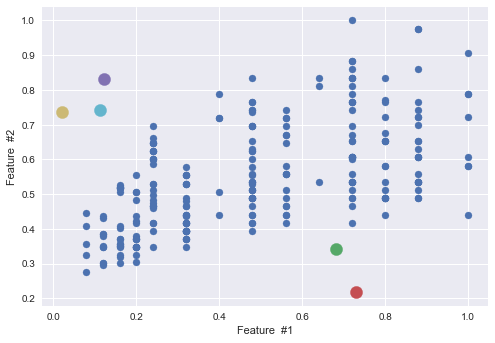

0
hood is:   0.18000000000000002


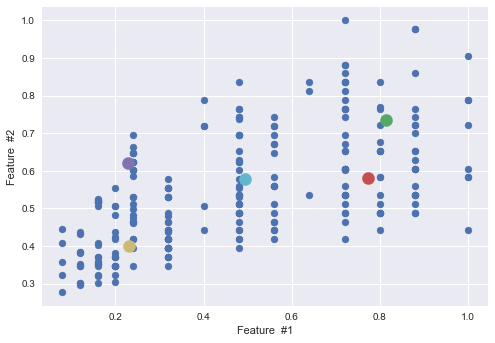

1
hood is:   0.16000000000000003


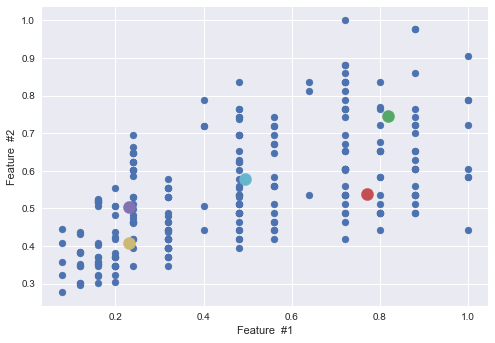

2
hood is:   0.14000000000000004


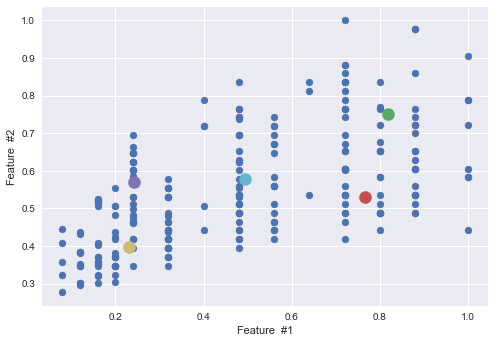

3
hood is:   0.12000000000000004


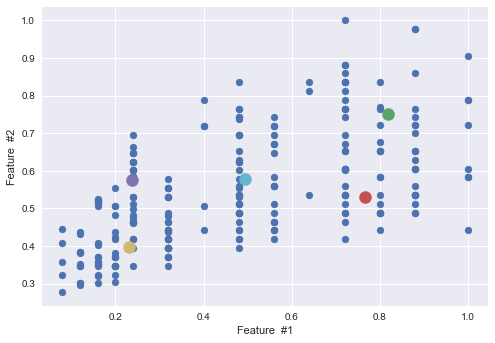

4
hood is:   0.10000000000000003


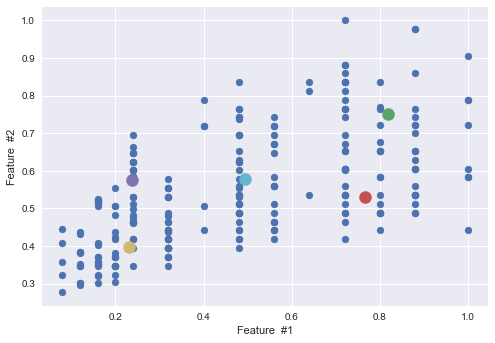

5
hood is:   0.08000000000000003


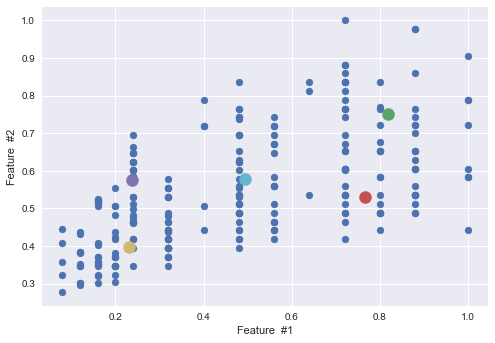

6
hood is:   0.060000000000000026


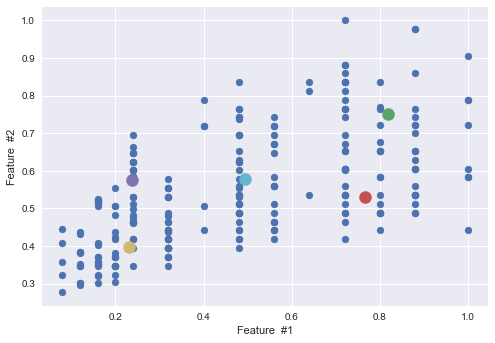

7
hood is:   0.04000000000000002


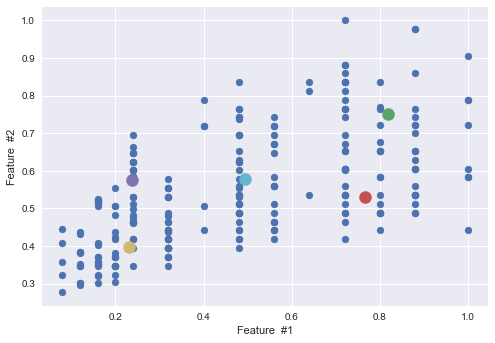

8
hood is:   0.02000000000000002


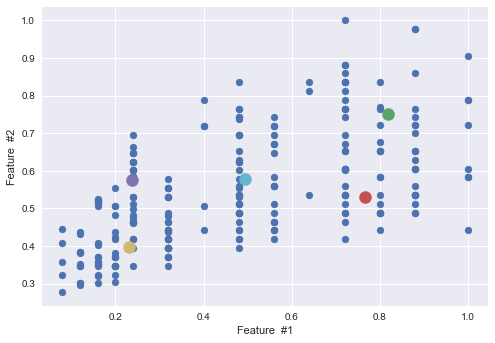

9
hood is:   2.0816681711721685e-17

The final weights: 
 [[0.819  0.7503]
 [0.7662 0.5308]
 [0.2386 0.5763]
 [0.2305 0.397 ]
 [0.4934 0.5774]]
FIN


In [1]:
import sys, os
import time
import numpy as np, numpy.random
import matplotlib.pyplot as plt 
from scipy.spatial import distance
import pandas as pd

sys.path.append(os.path.realpath('..'))
df = pd.read_csv ("buddymove.csv")
df = df.drop (columns = ["User Id", "Religious", "Nature", "Shopping", "Picnic"])
print(df)

np.set_printoptions(suppress=True)

Z = df.to_numpy()
X = np.asarray(Z, dtype = np.float64, order = 'C')
n=len(X)
d=len(X[0])

Orgn = numpy.zeros(d)
np.random.shuffle(X)
x1=[]
y1=[]
for row in range(len(X)):
    x1.append(X[row,0])
    y1.append(X[row,1])
    vec3 = [x1[row],y1[row]]
    x1[row] = x1[row]/max(X[:,0])
    y1[row] = y1[row]/max(X[:,1])
    #  Below is alt normalizing function.
    #x1[row] = x1[row]/distance.euclidean(Orgn[:],vec3[:])
    #y1[row] = y1[row]/distance.euclidean(Orgn[:],vec3[:])

#print ("X is: ", X)

k=5 #  Trainable neurons
alpha=0.25 #  learning rate
hood=0.20 #  Neighborhood area
hoodweight=0.25 #  Modifier for distance travelled by neighboring neurons
epochs = 10 #  Epochs

print("\n Total Amount of Data: ", n)
print("Total number of features: ",d)
print("Total number of clusters: ",k)

#  Randomly initialize weights
neuralw = np.random.rand(k,d)
print("\nThe inital weights: \n", np.round(neuralw,2))


hooditer = hood/epochs
for it in range(epochs):

    #plotting
    plt.style.use('seaborn')
    plt.scatter(x1,y1)
    for j in range(k):
        plt.scatter(neuralw[j,0],neuralw[j,1],s = 150)
    plt.xlabel('Feature  #1')
    plt.ylabel('Feature  #2')
    plt.show()
    img = str(it)
    print(img)

    for i in range(n):
        distMin = 99999999
        vec = [x1[i],y1[i]]
        #print("original weights are ", neuralw[0],neuralw[1],neuralw[2])
        for j in range(k):
            dist = distance.euclidean(neuralw[j],vec[:])
            #print("neuralw[j] is ", neuralw[j])
            #print("vec 0 is ", vec[:])
            if distMin > dist:
                distMin = dist
                jMin = j
        neuralw[jMin] = neuralw[jMin] + alpha*(vec[:] - neuralw[jMin])
       # print("sub is : ", neuralw[jMin] - vec[:])
        for j in range(k):
            if distance.euclidean(neuralw[j],neuralw[jMin]) <= hood and j != jMin:
                neuralw[j] = neuralw[j] + alpha*hoodweight*(vec[:] - neuralw[j])
    hood = hood-(hooditer)
    print("hood is:  ", hood)

print("\nThe final weights: \n",np.round(neuralw,4))
print ("FIN")